### plot drift times against stellar age for each source
#### for kernel density estimator see
#### https://scikit-learn.org/stable/auto_examples/neighbors/plot_kde_1d.html#sphx-glr-auto-examples-neighbors-plot-kde-1d-py0

In [2]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import pandas as pd
from sklearn.neighbors import KernelDensity

%matplotlib inline

In [13]:
colnames = ['Source', 't_star', 't_drift_min', 't_drift_max', 'M_min', 'M_max']
df = pd.read_csv('drift_fit_results.txt', skiprows=1, header=0, sep='\s+', names=colnames)
df.sort_values(by=['t_star'])
df.insert(df.columns.size, 'ratio_min', df['t_drift_min']/df['t_star'])
df.insert(df.columns.size, 'ratio_max', df['t_drift_max']/df['t_star'])
df.sort_values(by=['ratio_max'])

<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
/var/folders/vy/3w_cyymn26g4jzqfnt1dv5xm0000gn/T/ipykernel_9700/4274942482.py:2: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv('drift_fit_results.txt', skiprows=1, header=0, sep='\s+', names=colnames)


,Source,t_star,t_drift_min,t_drift_max,M_min,M_max,ratio_min,ratio_max
28,J10590108-7722407,2.0,0.010,0.060,0.0068,0.1864,0.0050,0.0300
23,J11173700-7704381,2.0,0.017,0.208,0.0031,0.1449,0.0085,0.1040
24,J11105333-7634319,2.0,0.025,0.310,0.0036,0.1419,0.0125,0.1550
6,Sz98,2.0,0.074,0.355,0.0228,0.2245,0.0370,0.1775
5,Sz129,2.0,0.086,0.419,0.0176,0.1747,0.0430,0.2095
25,J11095340-7634255,2.0,0.062,0.626,0.0085,0.2067,0.0310,0.3130
26,J11123092-7644241,2.0,0.020,0.672,0.0014,0.1958,0.0100,0.3360
10,Sz68,2.0,0.146,0.745,0.0150,0.1360,0.0730,0.3725
18,J162623.6-242439,1.0,0.091,0.414,0.0243,0.2178,0.0910,0.4140
8,Sz130,2.0,0.011,0.981,0.0005,0.1566,0.0055,0.4905


In [4]:
# drop the outlier V4046 Sgr
#df.drop(index=39, inplace=True)
#bad_indices = [11, 17, 19, 23, 33, 39, 40]
#for i in bad_indices:
#    df.drop(index=i, inplace=True)
#df.reset_index(inplace=True)

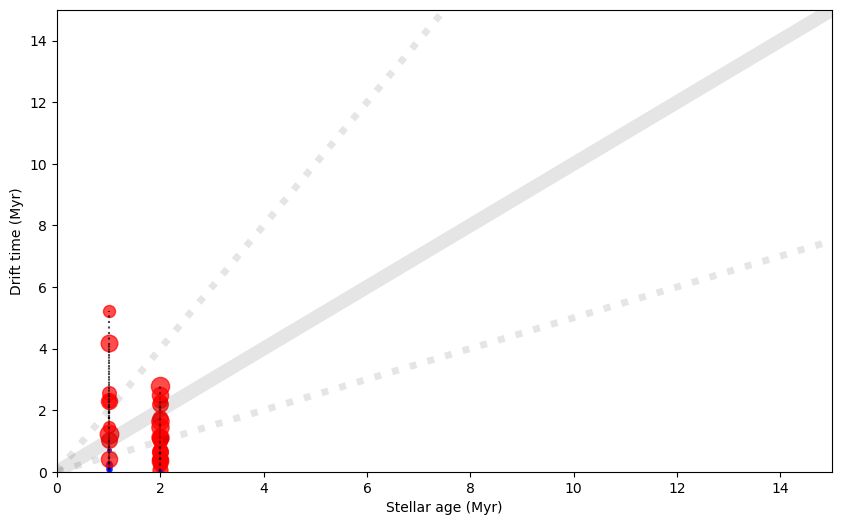

In [7]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

scale = 25
for i in range(len(df)):
    x = df['t_star'][i]
    y1 = df['t_drift_min'][i]
    y2 = df['t_drift_max'][i]

    if df['M_min'][i] > 0.00:
        s1 = np.sqrt(df['M_min'][i]) * scale
        s2 = np.sqrt(df['M_max'][i]) * scale
        ax.plot(x, y1, 'o', color='blue', alpha=0.7, ms=s1, label=df['Source'][i])
        ax.plot(x, y2, 'o', color='red',  alpha=0.7, ms=s2)
        ax.plot([x,x], [y1, y2], ':', color='black', alpha=0.7)
ax.set_xlabel('Stellar age (Myr)')
ax.set_ylabel('Drift time (Myr)')

ymax = 27
ymax = 15
ax.set_xlim(0,ymax)
ax.set_ylim(0,ymax)
#ax.set_xscale('log')
#ax.set_yscale('log')

ax.plot([0,ymax], [0,ymax], '-', lw=10, color='black', alpha=0.1)
ax.plot([0,ymax], [0,2*ymax], ':', lw=5, color='black', alpha=0.1)
ax.plot([0,2*ymax], [0,ymax], ':', lw=5, color='black', alpha=0.1)

In [9]:
for i in range(len(df)-1):
    print(f"{df['Source'][i]:17s}  {df['t_drift_max'][i]/df['t_star'][i]:6.3f}   {df['M_max'][i]:6.3f}")

AS209               0.796    0.277
CIDA1               2.677    0.088
CIDA7               3.228    0.063
CITau               0.443    0.339
CXTau               3.236    0.112
CYTau               1.196    0.146
DLTau               1.859    0.371
DMTau               1.661    0.278
DNTau               1.900    0.244
DoAr25              0.091    0.257
DoAr33              1.376    0.152
FPTau               0.038    0.086
GOTau               2.316    0.283
GWLup               0.980    0.166
HD142666            0.321    0.376
HD143006            0.148    0.332
HD163296            0.310    0.668
IMLup               4.204    0.455
IQTau               0.153    0.194
J04202555+2700355   0.069    0.045
J04334465+2615005   0.800    0.084
J11004022–7619280   0.425    0.157
J16000236-4222145   0.541    0.119
J16083070-3828268   3.454    0.421
MHO6                1.418    0.090
MPMus               0.240    0.223
MYLup               1.264    0.265
RYLup               0.343    0.354
SR4                 

<class 'type'> median/mean/std = 10.55 22.77 45.74


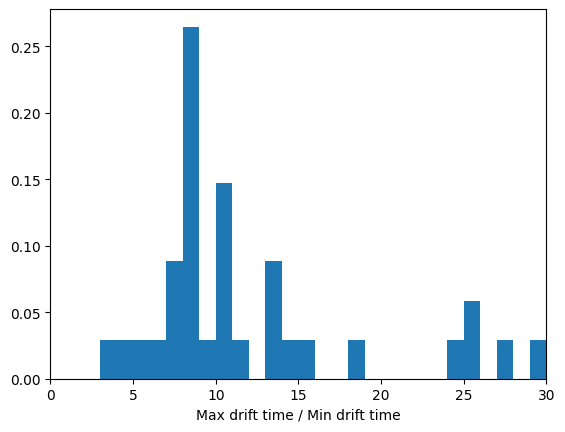

In [10]:
y = df['t_drift_max']/df['t_drift_min']
plt.hist(y, range=(0,30), bins=30, density=True)
plt.xlim(0, 30)
plt.xlabel('Max drift time / Min drift time')
print(f'{type} median/mean/std = {np.median(y):4.2f} {np.mean(y):4.2f} {np.std(y):4.2f}')

(0.0, 0.6)

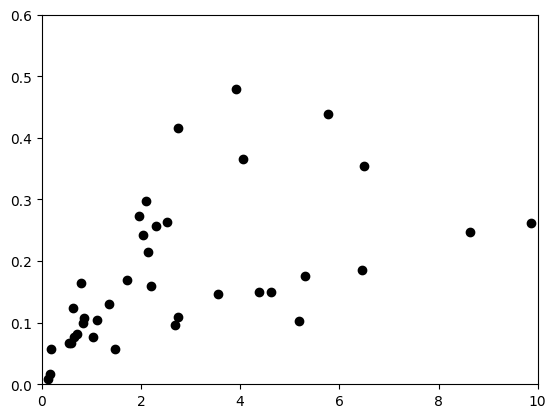

In [11]:
plt.plot(df['t_drift_max'], df['t_drift_min'], 'ko')
plt.xlim(0,10)
plt.ylim(0,0.6)

(0.0, 15.0)

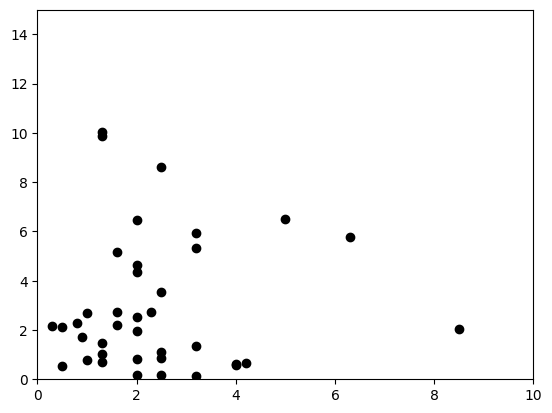

In [12]:
plt.plot(df['t_star'], df['t_drift_max'], 'ko')
plt.xlim(0,10)
plt.ylim(0,15)

In [13]:
from scipy import stats
print("Max drift vs stellar age", stats.pearsonr(df['t_drift_max'], df['t_star']))
print("Min drift vs stellar age", stats.pearsonr(df['t_drift_min'], df['t_star']))
print("Max drift vs min drift  ", stats.pearsonr(df['t_drift_max'], df['t_drift_min']))
print("Min drift vs dust mass  ", stats.pearsonr(df['t_drift_min'], df['M_min']))
print("Max drift vs dust mass  ", stats.pearsonr(df['t_drift_max'], df['M_min']))
print("Max drift vs max mass   ", stats.pearsonr(df['t_drift_max'], df['M_max']))

Max drift vs stellar age PearsonRResult(statistic=0.6551358848443694, pvalue=3.3538697234289436e-06)
Min drift vs stellar age PearsonRResult(statistic=0.10853843472373892, pvalue=0.4993630525358036)
Max drift vs min drift   PearsonRResult(statistic=0.29476939309708083, pvalue=0.061361222043255045)
Min drift vs dust mass   PearsonRResult(statistic=0.5218050329752303, pvalue=0.00046724253512792346)
Max drift vs dust mass   PearsonRResult(statistic=-0.1453081974266357, pvalue=0.36468353156614614)
Max drift vs max mass    PearsonRResult(statistic=0.2899995924849923, pvalue=0.06588212073932842)


Text(0.5, 0, 'Max drift time / Stellar age')

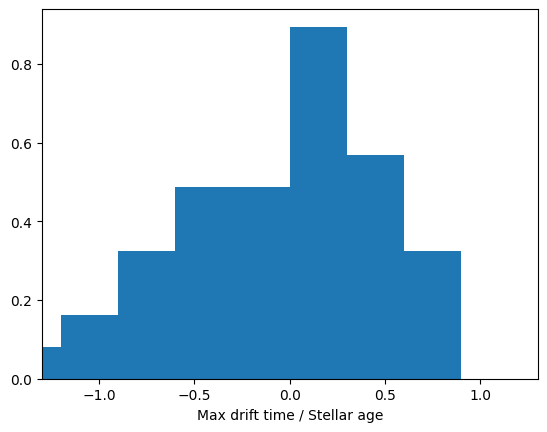

In [14]:
plt.hist(np.log10(df['t_drift_max']/df['t_star']), range=(-1.5,1.5), bins=10, density=True)
plt.xlim(-1.3, 1.3)
plt.xlabel('Max drift time / Stellar age')

Median log(drift ratio) = -0.15
Mean log(drift ratio) = -0.18
Std log(drift ratio) = 0.47


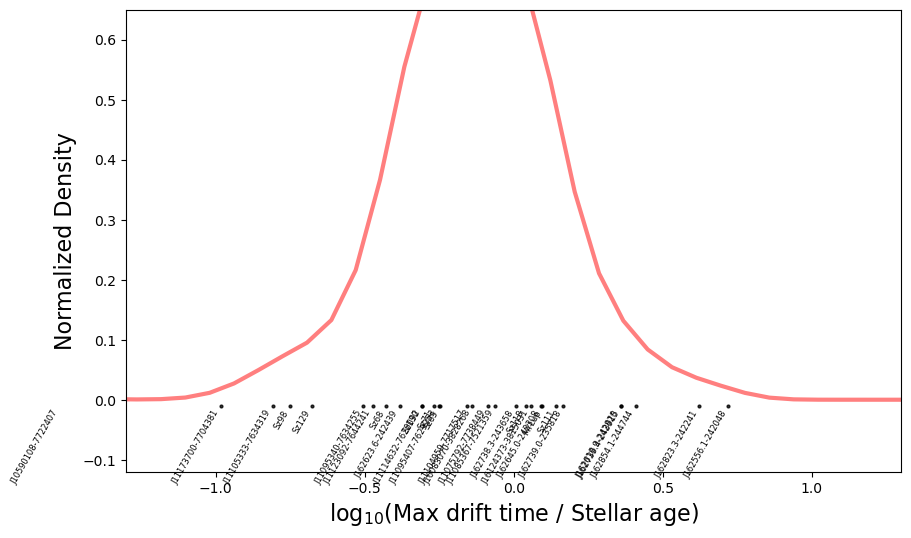

In [14]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

ratio_min = -2
ratio_max = 2
ratio = np.linspace(ratio_min, ratio_max)

log_t_ratio = np.array(np.log10(df['t_drift_max']/df['t_star']))
print(f'Median log(drift ratio) = {np.median(log_t_ratio):4.2f}')
print(f'Mean log(drift ratio) = {np.mean(log_t_ratio):4.2f}')
print(f'Std log(drift ratio) = {np.std(log_t_ratio):4.2f}')

kde = KernelDensity(kernel='gaussian', bandwidth=0.15).fit(log_t_ratio.reshape(-1,1))
log_dens = kde.score_samples(ratio.reshape(-1,1))
ax.plot(ratio, 10**log_dens, color='red', lw=3, alpha=0.5)

ymin = -0.12
ymax = 0.65
ax.plot(log_t_ratio, np.full(log_t_ratio.size, -0.01), 'k.', ms=4, alpha=0.8)
for i in range(log_t_ratio.size):
        ax.text(log_t_ratio[i], -0.015, df['Source'][i], ha='right', va='top', rotation=60, fontsize=6)

ax.set_ylim(ymin, ymax)
ax.set_xlim(-1.3, 1.3)
ax.set_xlabel(r'log$_{10}$(Max drift time / Stellar age)', fontsize=16)
ax.set_ylabel('Normalized Density', fontsize=16)
plt.savefig('max_drift_time_ratio.png')

Median log(drift ratio) = -1.34
Mean log(drift ratio) = -1.34
Std log(drift ratio) = 0.52


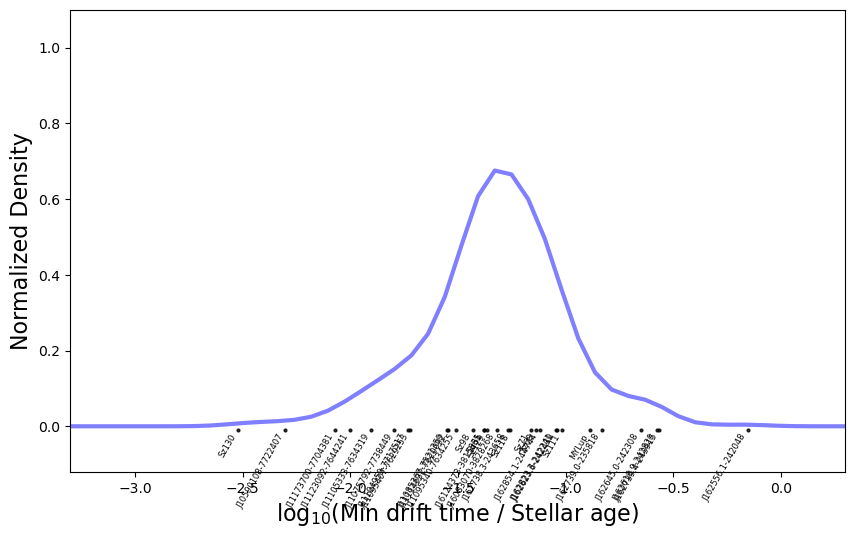

In [9]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

ratio_min = -3.5
ratio_max = 0.3
ratio = np.linspace(ratio_min, ratio_max)

log_t_ratio = np.array(np.log10(df['t_drift_min']/df['t_star']))
print(f'Median log(drift ratio) = {np.median(log_t_ratio):4.2f}')
print(f'Mean log(drift ratio) = {np.mean(log_t_ratio):4.2f}')
print(f'Std log(drift ratio) = {np.std(log_t_ratio):4.2f}')

kde = KernelDensity(kernel='gaussian', bandwidth=0.15).fit(log_t_ratio.reshape(-1,1))
log_dens = kde.score_samples(ratio.reshape(-1,1))
ax.plot(ratio, 10**log_dens, color='blue', lw=3, alpha=0.5)

ymin = -0.12
ymax = 1.1
ax.plot(log_t_ratio, np.full(log_t_ratio.size, -0.01), 'k.', ms=4, alpha=0.8)
for i in range(log_t_ratio.size):
        ax.text(log_t_ratio[i], -0.015, df['Source'][i], ha='right', va='top', rotation=60, fontsize=6)
ax.set_ylim(ymin, ymax)
ax.set_xlim(-3.3, 0.3)
ax.set_xlabel(r'log$_{10}$(Min drift time / Stellar age)', fontsize=16)
ax.set_ylabel('Normalized Density', fontsize=16)
plt.savefig('min_drift_time_ratio.png')

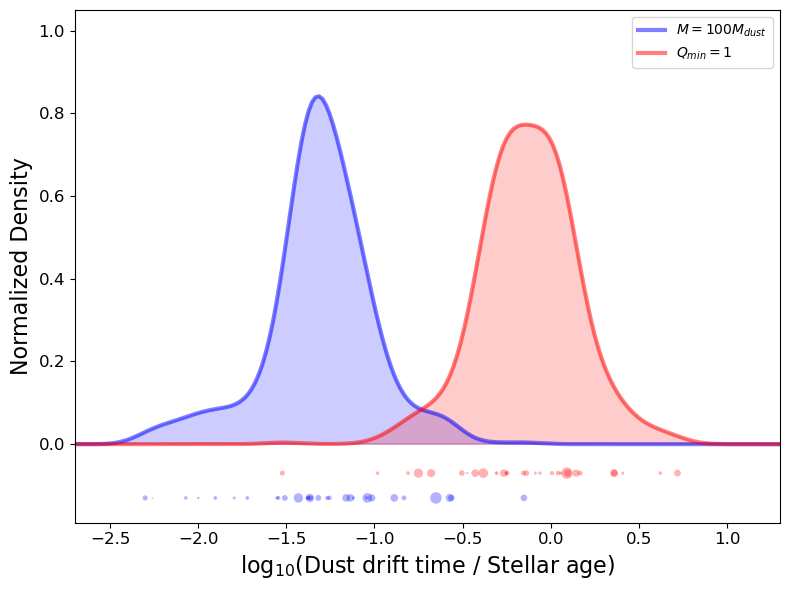

In [15]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

ratio_min = -3.0
ratio_max = 3.0
ratio = np.linspace(ratio_min, ratio_max, 300)
ndata = len(df)

log_t_ratio_max = np.array(np.log10(df['t_drift_max']/df['t_star']))
kde_max = KernelDensity(kernel='gaussian', bandwidth=0.15).fit(log_t_ratio_max.reshape(-1,1))
log_dens_max = kde_max.score_samples(ratio.reshape(-1,1))

log_t_ratio_min = np.array(np.log10(df['t_drift_min']/df['t_star']))
kde_min = KernelDensity(kernel='gaussian', bandwidth=0.15).fit(log_t_ratio_min.reshape(-1,1))
log_dens_min = kde_min.score_samples(ratio.reshape(-1,1))

ax.plot(ratio, 10**log_dens_min, color='blue', lw=3, alpha=0.5, label=r'$M=100M_{dust}$')
ax.fill(ratio, 10**log_dens_min, color='blue', alpha=0.2)
ax.plot(ratio, 10**log_dens_max, color='red', lw=3, alpha=0.5, label=r'$Q_{min}=1$')
ax.fill(ratio, 10**log_dens_max, color='red', alpha=0.2)

ymin = -0.19
ymax = 1.05
#ax.scatter(log_t_ratio_max, np.full(ndata, -0.07), s=10*df['t_star'], fc='red', ec='None', alpha=0.3)
ax.scatter(log_t_ratio_max, np.full(ndata, -0.07), s=2000*df['M_min'], fc='red', ec='None', alpha=0.3)
ax.scatter(log_t_ratio_min, np.full(ndata, -0.13), s=2000*df['M_min'], fc='blue', ec='None', alpha=0.3)
#ax.text(0.95, -0.08, 'Stellar age', fontsize=7, color='red', alpha=0.3)
#ax.text(0.05, -0.105, 'Dust mass', fontsize=7, color='blue', alpha=0.3)

#for i in range(ndata):
#        ax.plot([log_t_ratio_min[i], log_t_ratio_max[i]], [-0.09, -0.05], ':', color='black', alpha=0.3)

ax.set_ylim(ymin, ymax)
ax.set_xlim(-2.7, 1.3)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_xlabel(r'log$_{10}$(Dust drift time / Stellar age)', fontsize=16)
ax.set_ylabel('Normalized Density', fontsize=16)
ax.legend()
fig.tight_layout()
plt.savefig('drift_time_ratio.pdf', dpi=150)

In [18]:
def get_stats(type):
    x = df[type]
    print(f'{type} median/mean/std = {np.median(x):4.2f} {np.mean(x):4.2f} {np.std(x):4.2f}')

In [19]:
def get_logstats(type):
    x = np.log10(df[type])
    print(f'log10 {type} median/mean/std = {np.median(x):4.2f} {np.mean(x):4.2f} {np.std(x):4.2f}')

In [20]:
types = ['t_star', 't_drift_min', 't_drift_max', 'ratio_min', 'ratio_max']
for t in types:
    get_stats(t)
print('---------------------------------------------')
for t in types:
    get_logstats(t)

t_star median/mean/std = 2.00 3.42 4.36
t_drift_min median/mean/std = 0.15 0.20 0.16
t_drift_max median/mean/std = 2.20 3.53 4.17
ratio_min median/mean/std = 0.07 0.12 0.15
ratio_max median/mean/std = 1.13 1.72 1.92
---------------------------------------------
log10 t_star median/mean/std = 0.30 0.35 0.38
log10 t_drift_min median/mean/std = -0.83 -0.83 0.38
log10 t_drift_max median/mean/std = 0.34 0.31 0.49
log10 ratio_min median/mean/std = -1.17 -1.18 0.52
log10 ratio_max median/mean/std = 0.05 -0.04 0.55


In [21]:
f = open('kernel.csv', 'w')
f.write('tratio, logdens\n')
for i in range(ratio.size):
    f.write(f"{ratio[i]:8.5f},  {log_dens_max[i]:8.5f}\n")
f.close()